<h1>Bank Stocks from 2006 to early 2016</h1>
by Joseph Ramon

Exploratory data analysis of bank stock prices and how they progressed 
throughout the [financial crisis of 2007](https://en.wikipedia.org/wiki/Financial_crisis_of_2007%E2%80%9308) all the way to early 2016.

In [1]:
import pandas as pd
import numpy as np
import datetime
%matplotlib inline

<h1>Part 1 : Get Data from Yahoo Finance.</h1>
<br>
I won't use this data, but Part 1 is a guide on how to get and prepare 
the data from Yahoo Finance.<br><br>
In Part 2, I will read a similar pickle dataset taken from Google Finance.

<h2>Start of Part 1</h2>

<b>Get the Data</b>

Read data from Yahoo finance using [pandas-datareader](https://github.com/pydata/pandas-datareader) 

In [5]:
# install pandas-dateareader
!pip install pandas-datareader

In [6]:
from pandas_datareader import data, wb

<b>Data</b>

We will get stock information for the following banks:
*  Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo

** Stock data will be from Jan 1st 2006 to Jan 1st 2016 for each of these banks.
Each bank will have a separate dataframe, with the variable name for that bank 
being its ticker symbol. This will involve a few steps:**
1. Use datetime to set start and end datetime objects.
2. Figure out the ticker symbol for each bank.
2. Figure out how to use datareader to grab info on the stock.

** [documentation page](https://pandas-datareader.readthedocs.io/en/latest/remote_data.html)
    # Bank of America
    BAC = data.DataReader("BAC", 'google', start, end)

In [7]:
start = datetime.datetime(2006, 1, 1)
end = datetime.datetime(2016, 1, 1)

In [8]:
# Bank Of America
BAC = data.DataReader("BAC", 'yahoo', start, end)

# CitiGroup
C = data.DataReader("C", 'yahoo', start, end)

# Goldman Sachs
GS = data.DataReader("GS", 'yahoo', start, end)

# JPMorgan Chase
JPM = data.DataReader("JPM", 'yahoo', start, end)

# Morgan Stanley
MS = data.DataReader("MS", 'yahoo', start, end)

# Wells Fargo
WFC = data.DataReader("WFC", 'yahoo', start, end)

In [9]:
print('BAC head()\n',BAC.head())
print('BAC columns : ', BAC.columns)
print()
print('BAC tail()\n',BAC.tail())

BAC head()
                  High        Low       Open      Close      Volume  Adj Close
Date                                                                         
2006-01-03  47.180000  46.150002  46.919998  47.080002  16296700.0  33.942669
2006-01-04  47.240002  46.450001  47.000000  46.580002  17757900.0  33.582184
2006-01-05  46.830002  46.320000  46.580002  46.639999  14970700.0  33.625435
2006-01-06  46.910000  46.349998  46.799999  46.570000  12599800.0  33.574963
2006-01-09  46.970001  46.360001  46.720001  46.599998  15619400.0  33.596607
BAC columns :  Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], dtype='object')

BAC tail()
                  High        Low       Open      Close      Volume  Adj Close
Date                                                                         
2015-12-24  17.379999  17.219999  17.320000  17.270000  29369400.0  15.356150
2015-12-28  17.230000  16.980000  17.219999  17.129999  41777500.0  15.231659
2015-12-29  17.350000  

** Create a list of the ticker symbols (as strings) in alphabetical order. 

In [10]:
tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

** Concatenate the bank dataframes together to a single data frame called bank_stocks.<br><br> 
Set the keys argument equal to the tickers list. 
axis = 1 will be used to concatenate on.**

In [11]:
bank_stocks = pd.concat([BAC, C, GS, JPM, MS, WFC],axis=1,keys=tickers)

In [12]:
bank_stocks.head()

BAC                                                          \
                 High        Low       Open      Close      Volume  Adj Close   
Date                                                                            
2006-01-03  47.180000  46.150002  46.919998  47.080002  16296700.0  33.942669   
2006-01-04  47.240002  46.450001  47.000000  46.580002  17757900.0  33.582184   
2006-01-05  46.830002  46.320000  46.580002  46.639999  14970700.0  33.625435   
2006-01-06  46.910000  46.349998  46.799999  46.570000  12599800.0  33.574963   
2006-01-09  46.970001  46.360001  46.720001  46.599998  15619400.0  33.596607   

                     C                                      ...         MS  \
                  High         Low        Open       Close  ...       Open   
Date                                                        ...              
2006-01-03  493.799988  481.100006  490.000000  492.899994  ...  57.169998   
2006-01-04  491.000000  483.500000  488.600006  483.799988  ...  58.700001   
2006-01-05  487.799988  484.000000  484.399994  486.200012  ...  58.549999   
2006-01-06  489.000000  482.000000  488.799988  486.200012  ...  58.770000   
2006-01-09  487.399994  483.000000  486.000000  483.899994  ...  58.630001   

                                                   WFC                        \
                Close     Volume  Adj Close       High        Low       Open   
Date                                                                           
2006-01-03  58.310001  5377000.0  35.864346  31.975000  31.195000  31.600000   
2006-01-04  58.349998  7977800.0  35.888943  31.820000  31.365000  31.799999   
2006-01-05  58.509998  5778000.0  35.987339  31.555000  31.309999  31.500000   
2006-01-06  58.570000  6889800.0  36.024258  31.775000  31.385000  31.580000   
2006-01-09  59.189999  4144500.0  36.405598  31.825001  31.555000  31.674999   

                                              
                Close      Volume  Adj Close  
Date                                          
2006-01-03  31.900000  11016400.0  20.353476  
2006-01-04  31.530001  10870000.0  20.117413  
2006-01-05  31.495001  10158000.0  20.095074  
2006-01-06  31.680000   8403800.0  20.213118  
2006-01-09  31.674999   5619600.0  20.209927  

[5 rows x 36 columns]

In [13]:
bank_stocks.tail()

BAC                                                          \
                 High        Low       Open      Close      Volume  Adj Close   
Date                                                                            
2015-12-24  17.379999  17.219999  17.320000  17.270000  29369400.0  15.356150   
2015-12-28  17.230000  16.980000  17.219999  17.129999  41777500.0  15.231659   
2015-12-29  17.350000  17.160000  17.250000  17.280001  45670400.0  15.365038   
2015-12-30  17.240000  17.040001  17.200001  17.049999  35066400.0  15.160529   
2015-12-31  17.070000  16.830000  17.010000  16.830000  47153000.0  14.964910   

                    C                                   ...         MS  \
                 High        Low       Open      Close  ...       Open   
Date                                                    ...              
2015-12-24  52.970001  52.450001  52.480000  52.709999  ...  32.570000   
2015-12-28  52.570000  51.959999  52.570000  52.380001  ...  32.360001   
2015-12-29  53.220001  52.740002  52.759998  52.980000  ...  32.439999   
2015-12-30  52.939999  52.250000  52.840000  52.299999  ...  32.500000   
2015-12-31  52.389999  51.750000  52.070000  51.750000  ...  31.910000   

                                                   WFC                        \
                Close     Volume  Adj Close       High        Low       Open   
Date                                                                           
2015-12-24  32.480000  2798200.0  27.839367  55.090000  54.709999  54.970001   
2015-12-28  32.169998  5420300.0  27.573658  54.779999  54.169998  54.549999   
2015-12-29  32.549999  6388200.0  27.899370  55.349998  54.990002  55.110001   
2015-12-30  32.230000  5057200.0  27.625090  55.310001  54.790001  55.270000   
2015-12-31  31.809999  8154300.0  27.265093  54.950001  54.220001  54.509998   

                                              
                Close      Volume  Adj Close  
Date                                          
2015-12-24  54.820000   4999400.0  45.552624  
2015-12-28  54.680000   8288800.0  45.436298  
2015-12-29  55.290001   7894900.0  45.943176  
2015-12-30  54.889999   8016900.0  45.610783  
2015-12-31  54.360001  10929800.0  45.170383  

[5 rows x 36 columns]

** Set the column name levels

In [14]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']
bank_stocks.head()

Bank Ticker        BAC                                               \
Stock Info        High        Low       Open      Close      Volume   
Date                                                                  
2006-01-03   47.180000  46.150002  46.919998  47.080002  16296700.0   
2006-01-04   47.240002  46.450001  47.000000  46.580002  17757900.0   
2006-01-05   46.830002  46.320000  46.580002  46.639999  14970700.0   
2006-01-06   46.910000  46.349998  46.799999  46.570000  12599800.0   
2006-01-09   46.970001  46.360001  46.720001  46.599998  15619400.0   

Bank Ticker                      C                                      ...  \
Stock Info   Adj Close        High         Low        Open       Close  ...   
Date                                                                    ...   
2006-01-03   33.942669  493.799988  481.100006  490.000000  492.899994  ...   
2006-01-04   33.582184  491.000000  483.500000  488.600006  483.799988  ...   
2006-01-05   33.625435  487.799988  484.000000  484.399994  486.200012  ...   
2006-01-06   33.574963  489.000000  482.000000  488.799988  486.200012  ...   
2006-01-09   33.596607  487.399994  483.000000  486.000000  483.899994  ...   

Bank Ticker         MS                                         WFC             \
Stock Info        Open      Close     Volume  Adj Close       High        Low   
Date                                                                            
2006-01-03   57.169998  58.310001  5377000.0  35.864346  31.975000  31.195000   
2006-01-04   58.700001  58.349998  7977800.0  35.888943  31.820000  31.365000   
2006-01-05   58.549999  58.509998  5778000.0  35.987339  31.555000  31.309999   
2006-01-06   58.770000  58.570000  6889800.0  36.024258  31.775000  31.385000   
2006-01-09   58.630001  59.189999  4144500.0  36.405598  31.825001  31.555000   

Bank Ticker                                               
Stock Info        Open      Close      Volume  Adj Close  
Date                                                      
2006-01-03   31.600000  31.900000  11016400.0  20.353476  
2006-01-04   31.799999  31.530001  10870000.0  20.117413  
2006-01-05   31.500000  31.495001  10158000.0  20.095074  
2006-01-06   31.580000  31.680000   8403800.0  20.213118  
2006-01-09   31.674999  31.674999   5619600.0  20.209927  

[5 rows x 36 columns]

<h2>End of Part 1</h2>

<h1>Part 2 : Read data from Google Finance file</h1>

In [15]:
bank_stocks = pd.read_pickle('all_banks')

In [16]:
bank_stocks.head()   # note multi-index

Bank Ticker    BAC                                     C                       \
Stock Info    Open   High    Low  Close    Volume   Open   High    Low  Close   
Date                                                                            
2006-01-03   46.92  47.18  46.15  47.08  16296700  490.0  493.8  481.1  492.9   
2006-01-04   47.00  47.24  46.45  46.58  17757900  488.6  491.0  483.5  483.8   
2006-01-05   46.58  46.83  46.32  46.64  14970900  484.4  487.8  484.0  486.2   
2006-01-06   46.80  46.91  46.35  46.57  12599800  488.8  489.0  482.0  486.2   
2006-01-09   46.72  46.97  46.36  46.60  15620000  486.0  487.4  483.0  483.9   

Bank Ticker           ...     MS                                  WFC         \
Stock Info    Volume  ...   Open   High    Low  Close   Volume   Open   High   
Date                  ...                                                      
2006-01-03   1537660  ...  57.17  58.49  56.74  58.31  5377000  31.60  31.98   
2006-01-04   1871020  ...  58.70  59.28  58.35  58.35  7977800  31.80  31.82   
2006-01-05   1143160  ...  58.55  58.59  58.02  58.51  5778000  31.50  31.56   
2006-01-06   1370250  ...  58.77  58.85  58.05  58.57  6889800  31.58  31.78   
2006-01-09   1680740  ...  58.63  59.29  58.62  59.19  4144500  31.68  31.82   

Bank Ticker                          
Stock Info     Low  Close    Volume  
Date                                 
2006-01-03   31.20  31.90  11016400  
2006-01-04   31.36  31.53  10871000  
2006-01-05   31.31  31.50  10158000  
2006-01-06   31.38  31.68   8403800  
2006-01-09   31.56  31.68   5619600  

[5 rows x 30 columns]

In [17]:
tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

# Exploratory Data Analysis (EDA)

* Notes : use multi-level indexing<br>
[Multi-Level Indexing](http://pandas.pydata.org/pandas-docs/stable/advanced.html)<br>
[Using .xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html)

** Max Close price for each bank's stock throughout the time period?**

In [18]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').max()

Bank Ticker
BAC     54.90
C      564.10
GS     247.92
JPM     70.08
MS      89.30
WFC     58.52
dtype: float64

** Create a new empty DataFrame called returns. This dataframe will contain the returns for each bank's stock. returns are typically defined by:**

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [19]:
returns = pd.DataFrame()

In [20]:
for tick in tickers:
    returns[tick+' Return'] = bank_stocks[tick]['Close'].pct_change()
returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.000951
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005714
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,0.000000


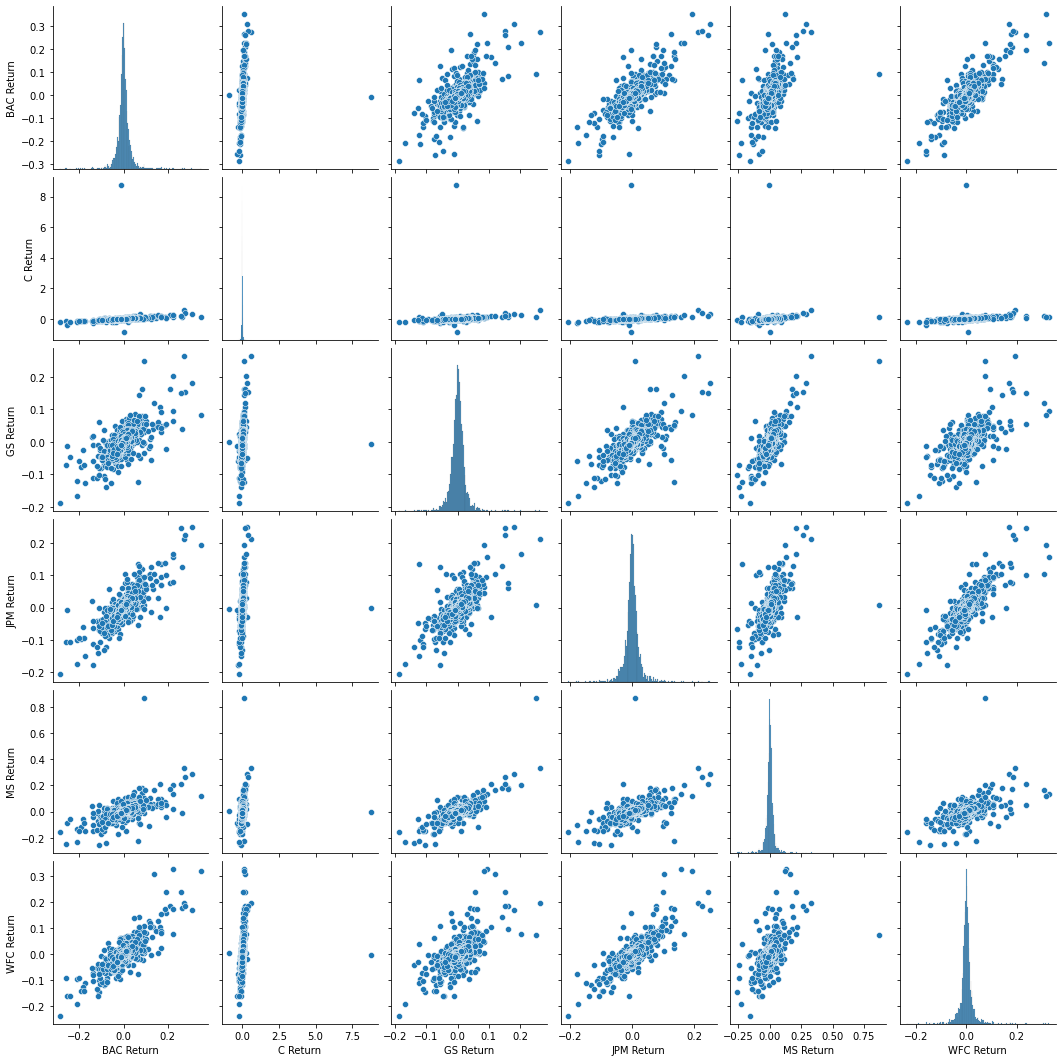

In [21]:
#returns[1:] - to exclude 1st row which are NAN, causing errors
import seaborn as sns
sns.pairplot(returns[1:])

From the above pairplot, we can see Citigroup's Returns scatterplot shows as a 
straight bundle of values.  This is due to [Citigroup's Stock Crash, details here.](https://en.wikipedia.org/wiki/Citigroup#November_2008.2C_Collapse_.26_US_Government_Intervention_.28part_of_the_Global_Financial_Crisis.29) 

** Using this returns DataFrame, figure out on what dates each bank stock had the best and worst single day returns. You should notice that 4 of the banks share the same day for the worst drop, did anything significant happen that day?**

In [22]:
# Worst Single-Day Returns Drop 
# 4 of them on Barack Obama's Inauguration day
returns.idxmin()

BAC Return   2009-01-20
C Return     2011-05-06
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2009-01-20
dtype: datetime64[ns]

In [23]:
# Best Single Day Gain
# citigroup stock split in May 2011, which meant it was thriving again and
# new stocks are more affordable.  JPM gained as well one day after 
# inauguration of Obama.
returns.idxmax()

BAC Return   2009-04-09
C Return     2011-05-09
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WFC Return   2008-07-16
dtype: datetime64[ns]

** STANDARD DEVIATION of Returns

Riskiest for the entire period, and riskiest for 2015

In [25]:
returns.std() # Citigroup riskiest

BAC Return    0.036650
C Return      0.179969
GS Return     0.025346
JPM Return    0.027656
MS Return     0.037820
WFC Return    0.030233
dtype: float64

In [26]:
returns.loc[returns.index.year == 2015].std()
# Very similar risk profiles, but Morgan Stanley or BAC

BAC Return    0.016163
C Return      0.015289
GS Return     0.014046
JPM Return    0.014017
MS Return     0.016249
WFC Return    0.012591
dtype: float64

<b>** Morgan Stanley - 2015 returns distribution plot **</b>

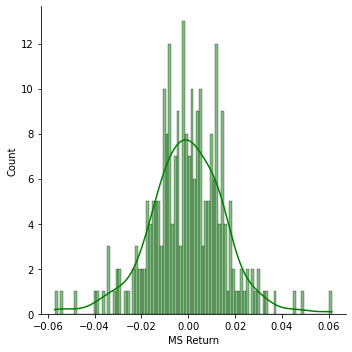

In [27]:
sns.displot(returns.loc[returns.index.year == 2015]['MS Return'],\
            color='green',bins=100,kde=True)

<b>** Citigroup - 2008 Returns distribution plot **</b>

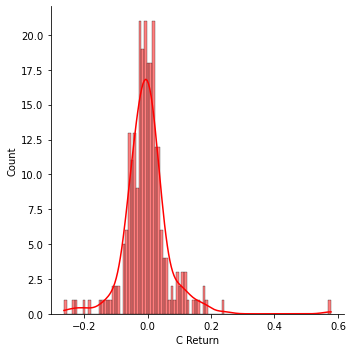

In [28]:
sns.displot(returns.loc[returns.index.year == 2008]['C Return'],\
            color='red',bins=100,kde=True)

____
# More Visualization


In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Plotly Method Imports
import plotly
import cufflinks as cf
cf.go_offline()

<b>** line plot showing Close price for each bank for the entire index of time. **</b>

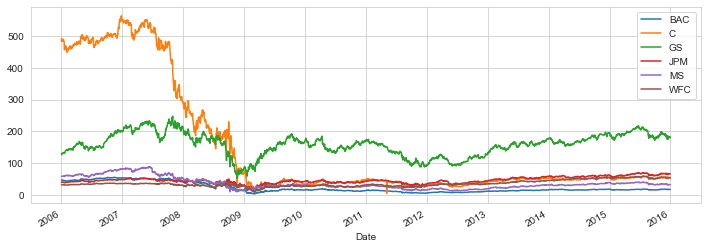

In [30]:
for tick in tickers:
    bank_stocks[tick]['Close'].plot(figsize=(12,4),label=tick)
plt.legend()

<AxesSubplot:xlabel='Date'>

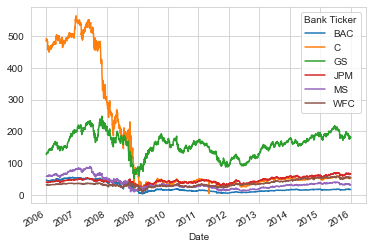

In [31]:
# alternative using .xs

bank_stocks.xs(key='Close',axis=1,level='Stock Info').plot()

In [32]:
# plotly
bank_stocks.xs(key='Close',axis=1,level='Stock Info').iplot()

## Moving Averages

Some moving averages for these stocks in the year 2008. 

** rolling 30 day average against the Close Price for Bank Of America's stock for the year 2008**

In [33]:
BAC=bank_stocks['BAC']
BAC.head()

Stock Info,Open,High,Low,Close,Volume
Date,,,,,
2006-01-03,46.92,47.18,46.15,47.08,16296700
2006-01-04,47.00,47.24,46.45,46.58,17757900
2006-01-05,46.58,46.83,46.32,46.64,14970900
2006-01-06,46.80,46.91,46.35,46.57,12599800
2006-01-09,46.72,46.97,46.36,46.60,15620000


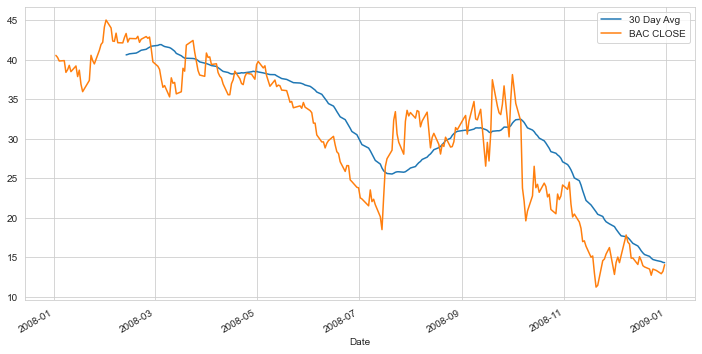

In [34]:
plt.figure(figsize=(12,6))
BAC['Close'].loc[returns.index.year == 2008].rolling(window=30).mean().plot\
    (label='30 Day Avg')
BAC['Close'].loc[returns.index.year == 2008].plot(label='BAC CLOSE')
plt.legend()

<b>** Heatmap of the correlation between the stocks Close Price.**</b>

<AxesSubplot:xlabel='Bank Ticker', ylabel='Bank Ticker'>

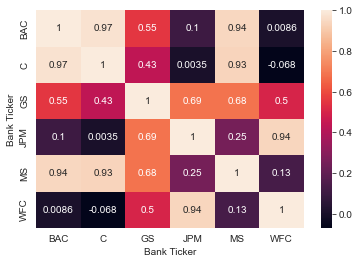

In [35]:
sns.heatmap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),\
            annot=True)

<b>** Clustermap to cluster the correlations together:**</b>

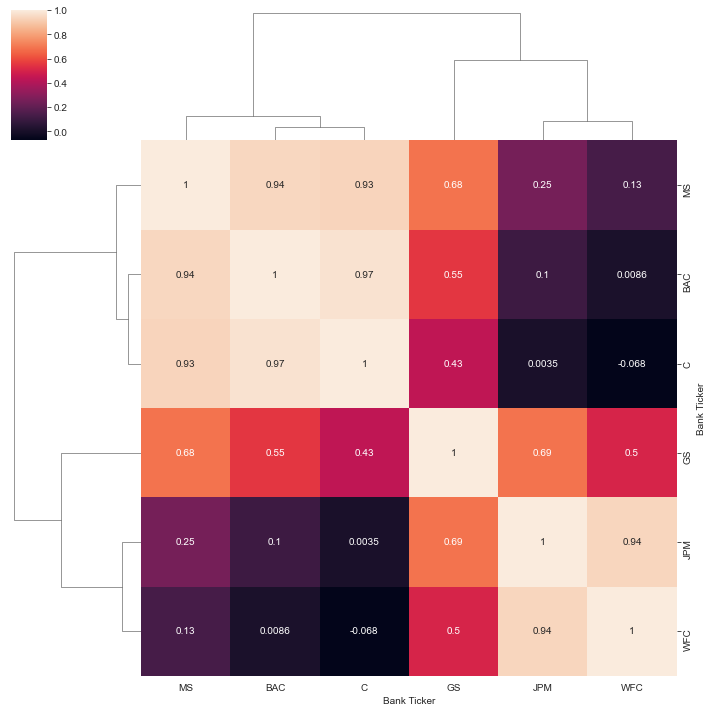

In [36]:
sns.clustermap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),\
               annot=True)

<b>** candle plot of Bank of America's stock from Jan 1st 2015 to Jan 1st 2016.**</b>

In [37]:
BAC[['Open', 'High', 'Low', 'Close']].loc[returns.index.year == 2008].\
    iplot(kind='candle')

<b>** a Simple Moving Averages plot of Morgan Stanley for the year 2015, using Use .ta_plot(study='sma') **</b>

In [38]:
MS['Close'].loc[returns.index.year == 2008].ta_plot(study='sma',periods=[13,21,55],\
                                                    title='Simple Moving Averages')

**.ta_plot(study='boll') to create a Bollinger Band Plot for Bank of America for the year 2015.**

In [39]:
BAC['Close'].loc[returns.index.year == 2008].ta_plot(study='boll')